In [1]:
# Data Preprocessing Mayorov Igor

In [37]:
# Загружаем необходимы библиотеки для работы с датасетом.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Импортируем собственно наш датасет.
df = pd.read_csv('kr3.csv', sep=',')

In [4]:
# Смотрим что было загружено. 
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,3.23,106.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,4.80,74.0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,5.20,86.0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,4.74,80.0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,6.30,55.7,1
611,64,f,24.0,102.8,2.9,44.4,20.0,3.02,63.0,1
612,64,f,29.0,87.3,3.5,99.0,48.0,3.63,66.7,1
613,46,f,33.0,NaN,39.0,62.0,20.0,4.20,52.0,1


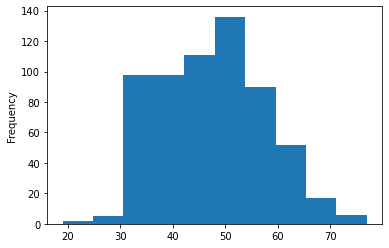

In [39]:
#Построим гистограммы по числовым переменным для того что определить нужно ли логарифмировать данные для лучшего исследоания. Как видим ниже из графиков данные лучше всего будет пролагорифмировать.
df['Age'].plot(kind = 'hist')

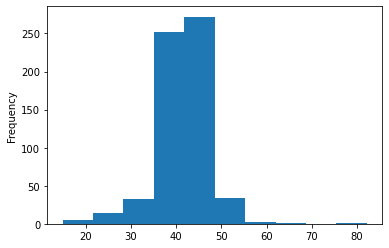

In [40]:
df['ALB'].plot(kind = 'hist')

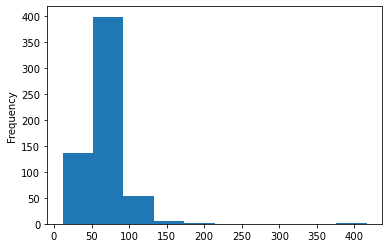

In [41]:
df['ALP'].plot(kind = 'hist')

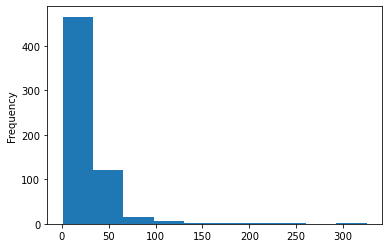

In [42]:
df['ALT'].plot(kind = 'hist')

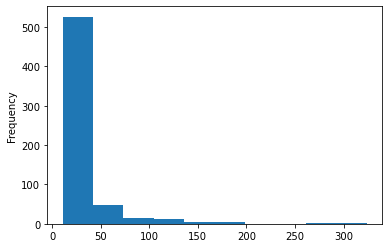

In [43]:
df['AST'].plot(kind = 'hist')

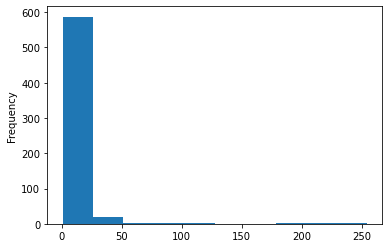

In [44]:
df['BIL'].plot(kind = 'hist')

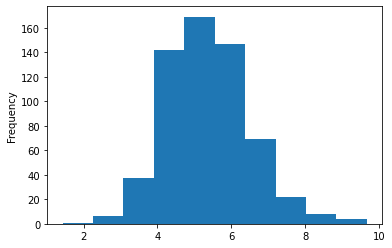

In [47]:
df['CHOL'].plot(kind = 'hist')

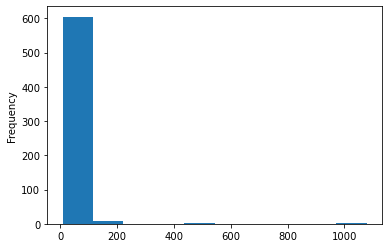

In [45]:
df['CREA'].plot(kind = 'hist')

In [49]:
#Логарифмируем данные
df_1 = df.copy()
df_1[['ALB', 'ALP','ALT', 'AST', 'BIL','CREA']] = np.log(df_1[['ALB', 'ALP','ALT', 'AST', 'BIL','CREA']])

In [50]:
#Смотрим статистику нашего датасета. 
df_1.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,3.717918,4.166953,3.127743,3.368057,2.079784,5.368099,4.346467,0.133333
std,10.055105,0.151705,0.336048,0.660515,0.504072,0.696324,1.132728,0.280440,0.340211
min,19.000000,2.701361,2.424803,-0.105361,2.360854,-0.223144,1.430000,2.079442,0.000000
25%,39.000000,3.658420,3.960813,2.797281,3.072693,1.667707,4.610000,4.204693,0.000000
50%,47.000000,3.736478,4.192680,3.135494,3.254243,1.987874,5.300000,4.343805,0.000000
75%,54.000000,3.811097,4.383276,3.498777,3.493473,2.415914,6.060000,4.477337,0.000000
max,77.000000,4.409155,6.032127,5.784748,5.780744,5.537334,9.670000,6.983883,1.000000


In [51]:
# Проверяем и заменяем пропуски в числовых столбцах дата сета.
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [54]:
# Заполняем значения NaN с помощью SimpleImputer.
from sklearn.impute import SimpleImputer
df_1 = fill_missing_num(df_1)

In [55]:
df_1

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32.0,m,3.650658,3.960813,2.041220,3.095578,2.014903,3.23,4.663439,0.0
1,32.0,m,3.650658,4.252772,2.890372,3.206803,1.360977,4.80,4.304065,0.0
2,32.0,m,3.848018,4.313480,3.589059,3.962716,1.808289,5.20,4.454347,0.0
3,32.0,m,3.765840,3.951244,3.421000,3.117950,2.939162,4.74,4.382027,0.0
4,32.0,m,3.668677,4.305416,3.484312,3.210844,2.261763,4.32,4.330733,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,f,3.465736,6.032127,1.774952,4.703204,3.912023,6.30,4.019980,1.0
611,64.0,f,3.178054,4.632785,1.064711,3.793239,2.995732,3.02,4.143135,1.0
612,64.0,f,3.367296,4.469350,1.252763,4.595120,3.871201,3.63,4.200205,1.0
613,46.0,f,3.496508,4.166953,3.663562,4.127134,2.995732,4.20,3.951244,1.0


In [56]:
#Проверяем на выбросы датасет и избавляемся от них.
def outliers(df_1):
    num_var = list(df_1._get_numeric_data().columns)
    for col_names in num_var:
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()-3*df_1[col_names].std() 
                            if y < df_1[col_names].mean()-3*df_1[col_names].std() else y)
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()+3*df_1[col_names].std() 
                            if y > df_1[col_names].mean()+3*df_1[col_names].std() else y)
    return(df_1)

In [57]:
df_1

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32.0,m,3.650658,3.960813,2.041220,3.095578,2.014903,3.23,4.663439,0.0
1,32.0,m,3.650658,4.252772,2.890372,3.206803,1.360977,4.80,4.304065,0.0
2,32.0,m,3.848018,4.313480,3.589059,3.962716,1.808289,5.20,4.454347,0.0
3,32.0,m,3.765840,3.951244,3.421000,3.117950,2.939162,4.74,4.382027,0.0
4,32.0,m,3.668677,4.305416,3.484312,3.210844,2.261763,4.32,4.330733,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,f,3.465736,6.032127,1.774952,4.703204,3.912023,6.30,4.019980,1.0
611,64.0,f,3.178054,4.632785,1.064711,3.793239,2.995732,3.02,4.143135,1.0
612,64.0,f,3.367296,4.469350,1.252763,4.595120,3.871201,3.63,4.200205,1.0
613,46.0,f,3.496508,4.166953,3.663562,4.127134,2.995732,4.20,3.951244,1.0


In [58]:
# Производим кодирование всех качественных переменных, в нашем случае только столбец Sex.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [59]:
df_1 = encoding_char(df_1)

In [60]:
#Проверка, были ли закодированные даныне. Как видим все верно. В данном случае  0-m ( мужской) 1-f (женский)
df_1

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32.0,0,3.650658,3.960813,2.041220,3.095578,2.014903,3.23,4.663439,0.0
1,32.0,0,3.650658,4.252772,2.890372,3.206803,1.360977,4.80,4.304065,0.0
2,32.0,0,3.848018,4.313480,3.589059,3.962716,1.808289,5.20,4.454347,0.0
3,32.0,0,3.765840,3.951244,3.421000,3.117950,2.939162,4.74,4.382027,0.0
4,32.0,0,3.668677,4.305416,3.484312,3.210844,2.261763,4.32,4.330733,0.0
...,...,...,...,...,...,...,...,...,...,...
610,62.0,1,3.465736,6.032127,1.774952,4.703204,3.912023,6.30,4.019980,1.0
611,64.0,1,3.178054,4.632785,1.064711,3.793239,2.995732,3.02,4.143135,1.0
612,64.0,1,3.367296,4.469350,1.252763,4.595120,3.871201,3.63,4.200205,1.0
613,46.0,1,3.496508,4.166953,3.663562,4.127134,2.995732,4.20,3.951244,1.0


In [61]:
# Шкалируем наши переменные для упрощения интерпритации в диапозоне  от 0 до 1 и что бы не исказить кодирование качественных переменных.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df_1)
df_1 = sc.transform(df_1)
pd.DataFrame(df_1, columns = ['Age','Sex','ALB','ALP','ALT','AST','BIL','CHOL','CREA','CATEGORY']).round()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,CATEGORY
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
611,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
612,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
613,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


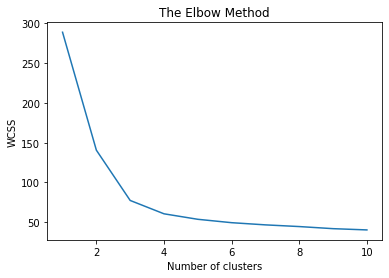

In [62]:
# Используя метод "локтя" посмотрим сколько же нужно выделить класеров для дальнейшего исследования. Как видим наибольшее падение начинается от двух кластеров и также от 4-х кластеров. Для того что бы определиться сколько выбрать кластеров используем метод силуэта. 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

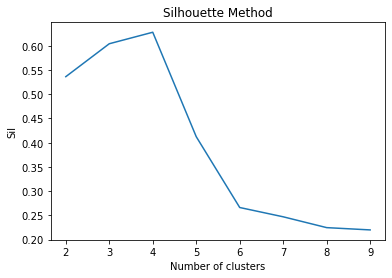

2:0.5363271968016567
3:0.6043009708279603
4:0.6280404335614175
5:0.4124339747023132
6:0.2662050705510356
7:0.2470229740360773
8:0.22466950238831948
9:0.21994743301772593


In [63]:
# Применяем метод силуэта от 2 до 10 кластеров. МЫ стремимся найти максимум и как видим на 4-х кластерах значение = 0,6797733098928154.Будем использовать 4 кластера.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df_1)  
  preds = kmeans.fit_predict(df_1)
  sil.append(silhouette_score(df_1, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [64]:
# Используем метод К средних и выведем ядра кластеров.. 
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df_1)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df_1)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALB','ALP','ALT','AST','BIL','CHOL','CREA','CATEGORY']).round()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,CATEGORY
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [205]:
# выделим 4 переменные
X = df_1[:, [0,1,4,5,9]]

In [206]:
# Построим функции на 4-х кластерах и выведем ядра кластеров. 
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALT','AST','CATEGORY']).round()

,Age,Sex,ALT,AST,CATEGORY
0,0.0,-0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0


In [207]:
#Сравним резльтаты по иерархической кластеризации и метода К средних
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

In [208]:
# Прошкалируем данные. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df_1)
df = sc.transform(df_1)

In [209]:
X = df_1[:, [0,1,4,5,9]]

In [23]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


In [210]:
#Обучим модель на 5000 случаях.
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 5000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


In [25]:
df

array([[-1.53361617, -0.79454373, -0.54064724, ..., -1.9046761 ,
         0.49707027, -0.39223227],
       [-1.53361617, -0.79454373, -0.54064724, ..., -0.50607798,
        -0.14658961, -0.39223227],
       [-1.53361617, -0.79454373,  0.91485031, ..., -0.14974725,
         0.09478284, -0.39223227],
       ...,
       [ 1.65143725,  1.25858397, -2.18674566, ..., -1.54834537,
        -0.29342452,  2.54950976],
       [-0.1401553 ,  1.25858397, -1.49365159, ..., -1.04057408,
        -0.58910578,  2.54950976],
       [ 1.15377266,  1.25858397, -0.97383104, ..., -0.06066457,
        -0.28739021,  2.54950976]])

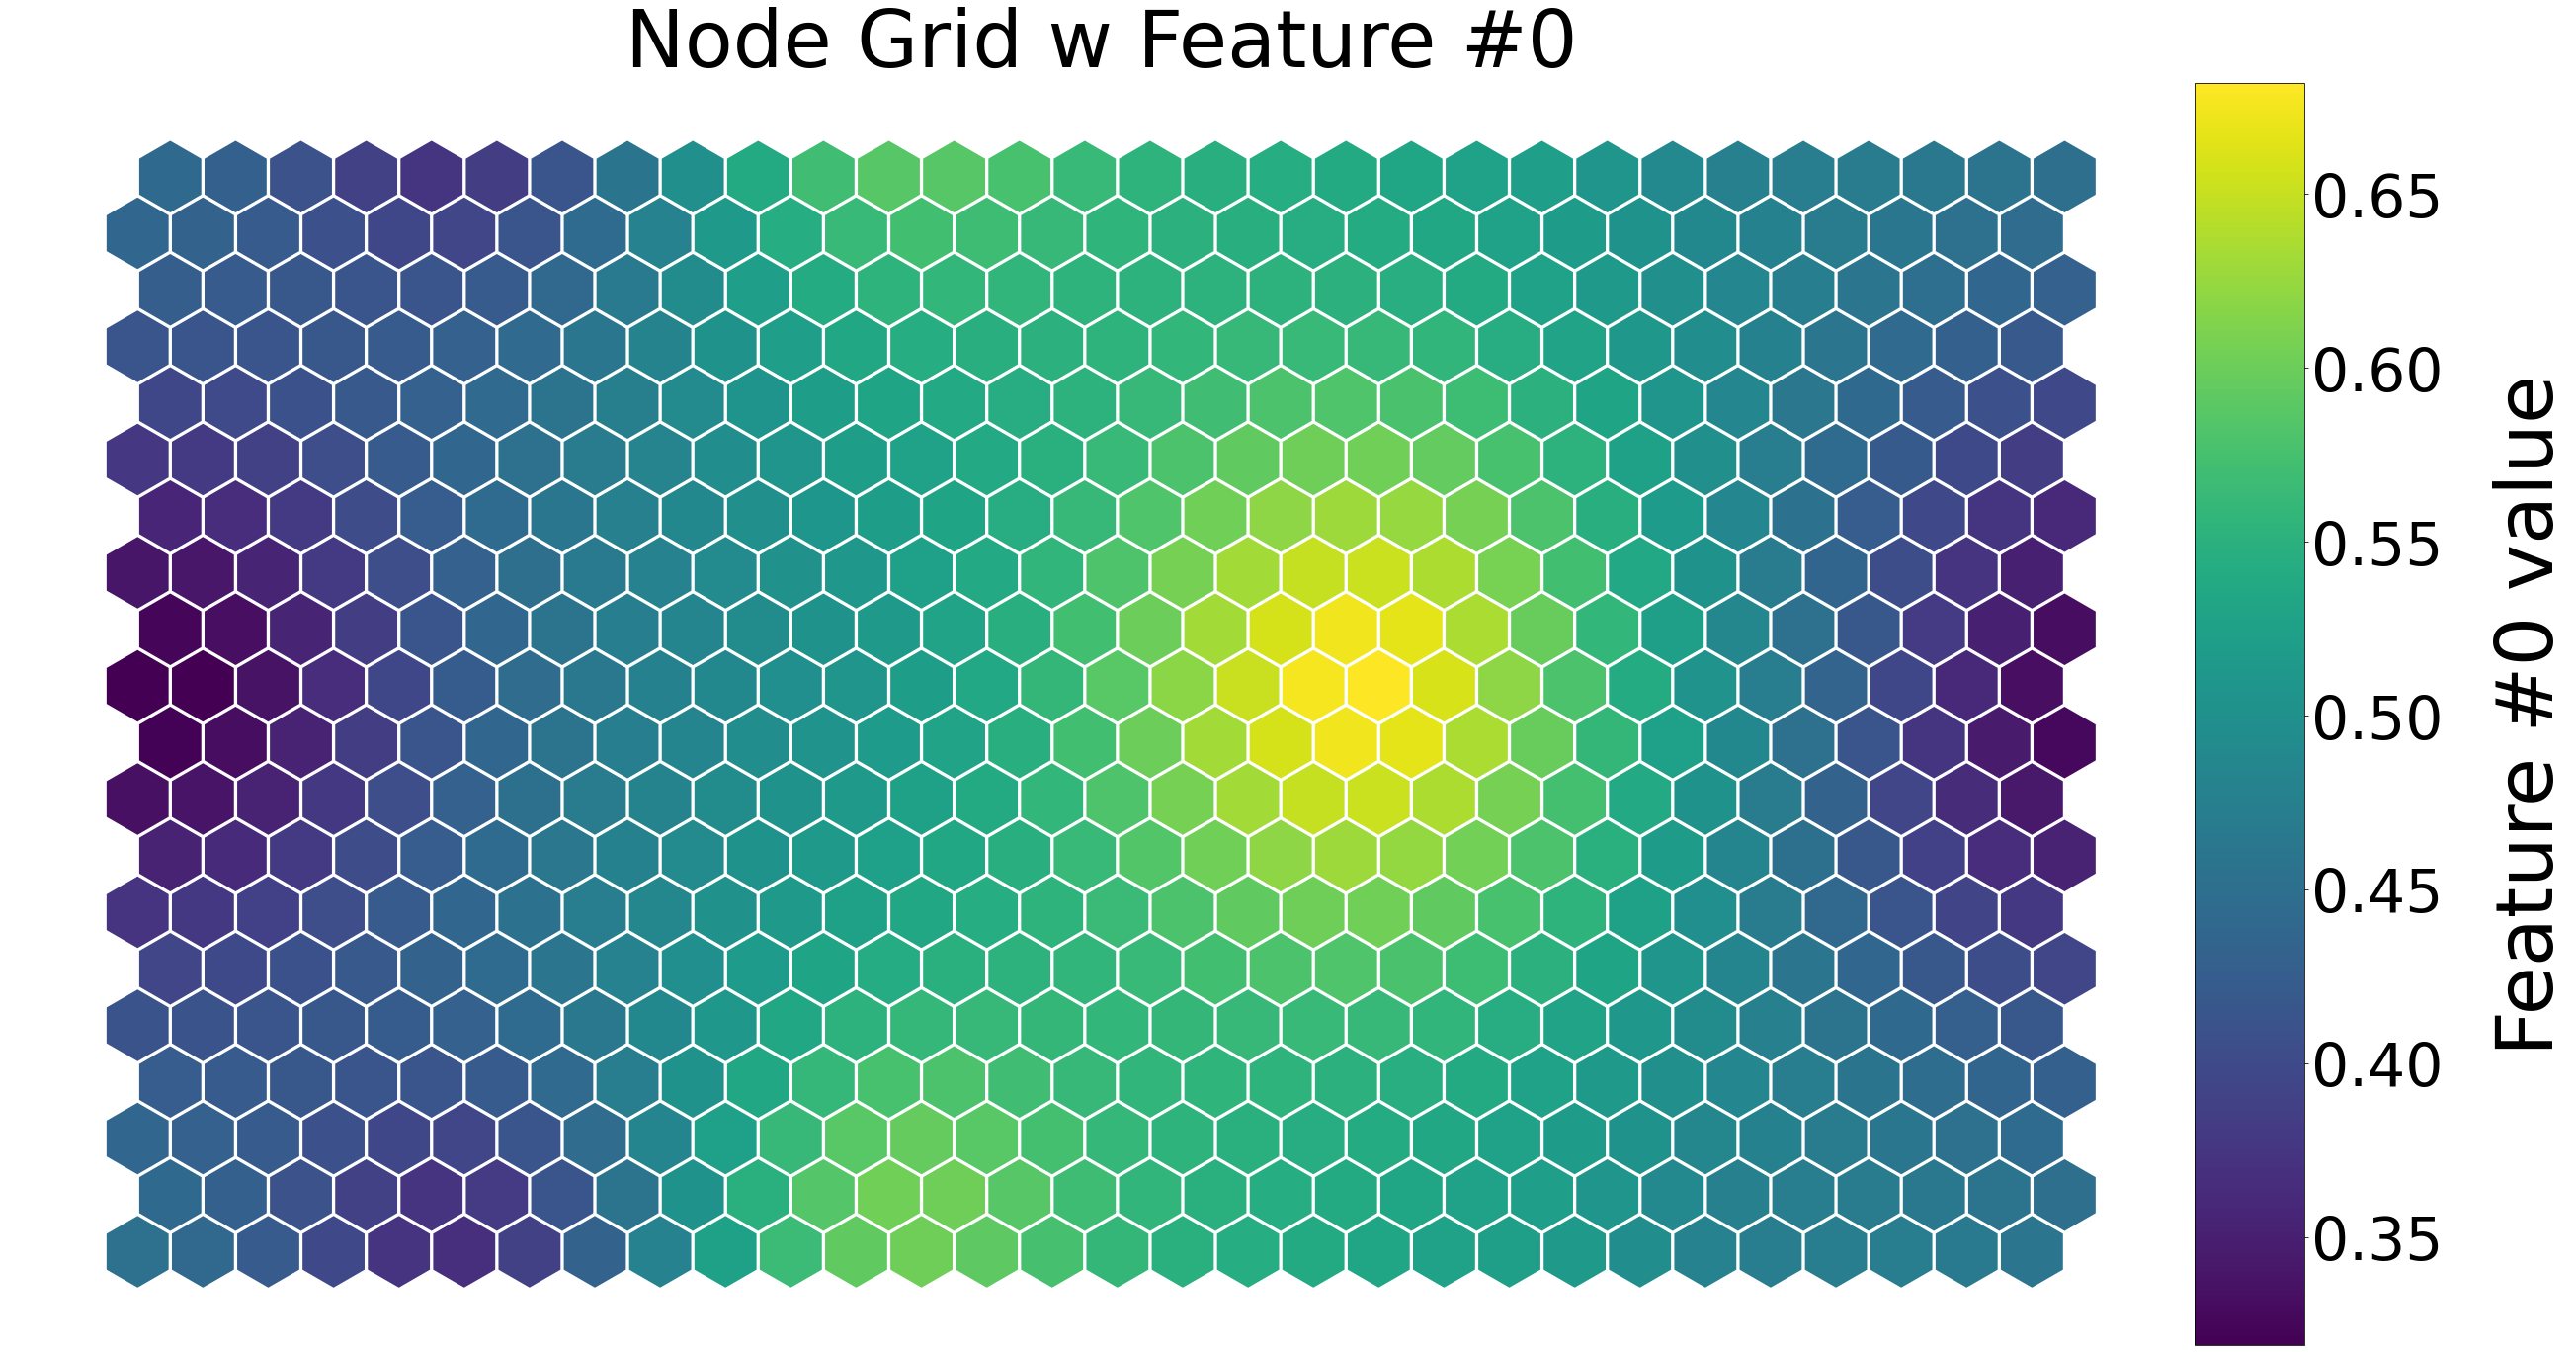

In [215]:
net.nodes_graph(colnum=0)

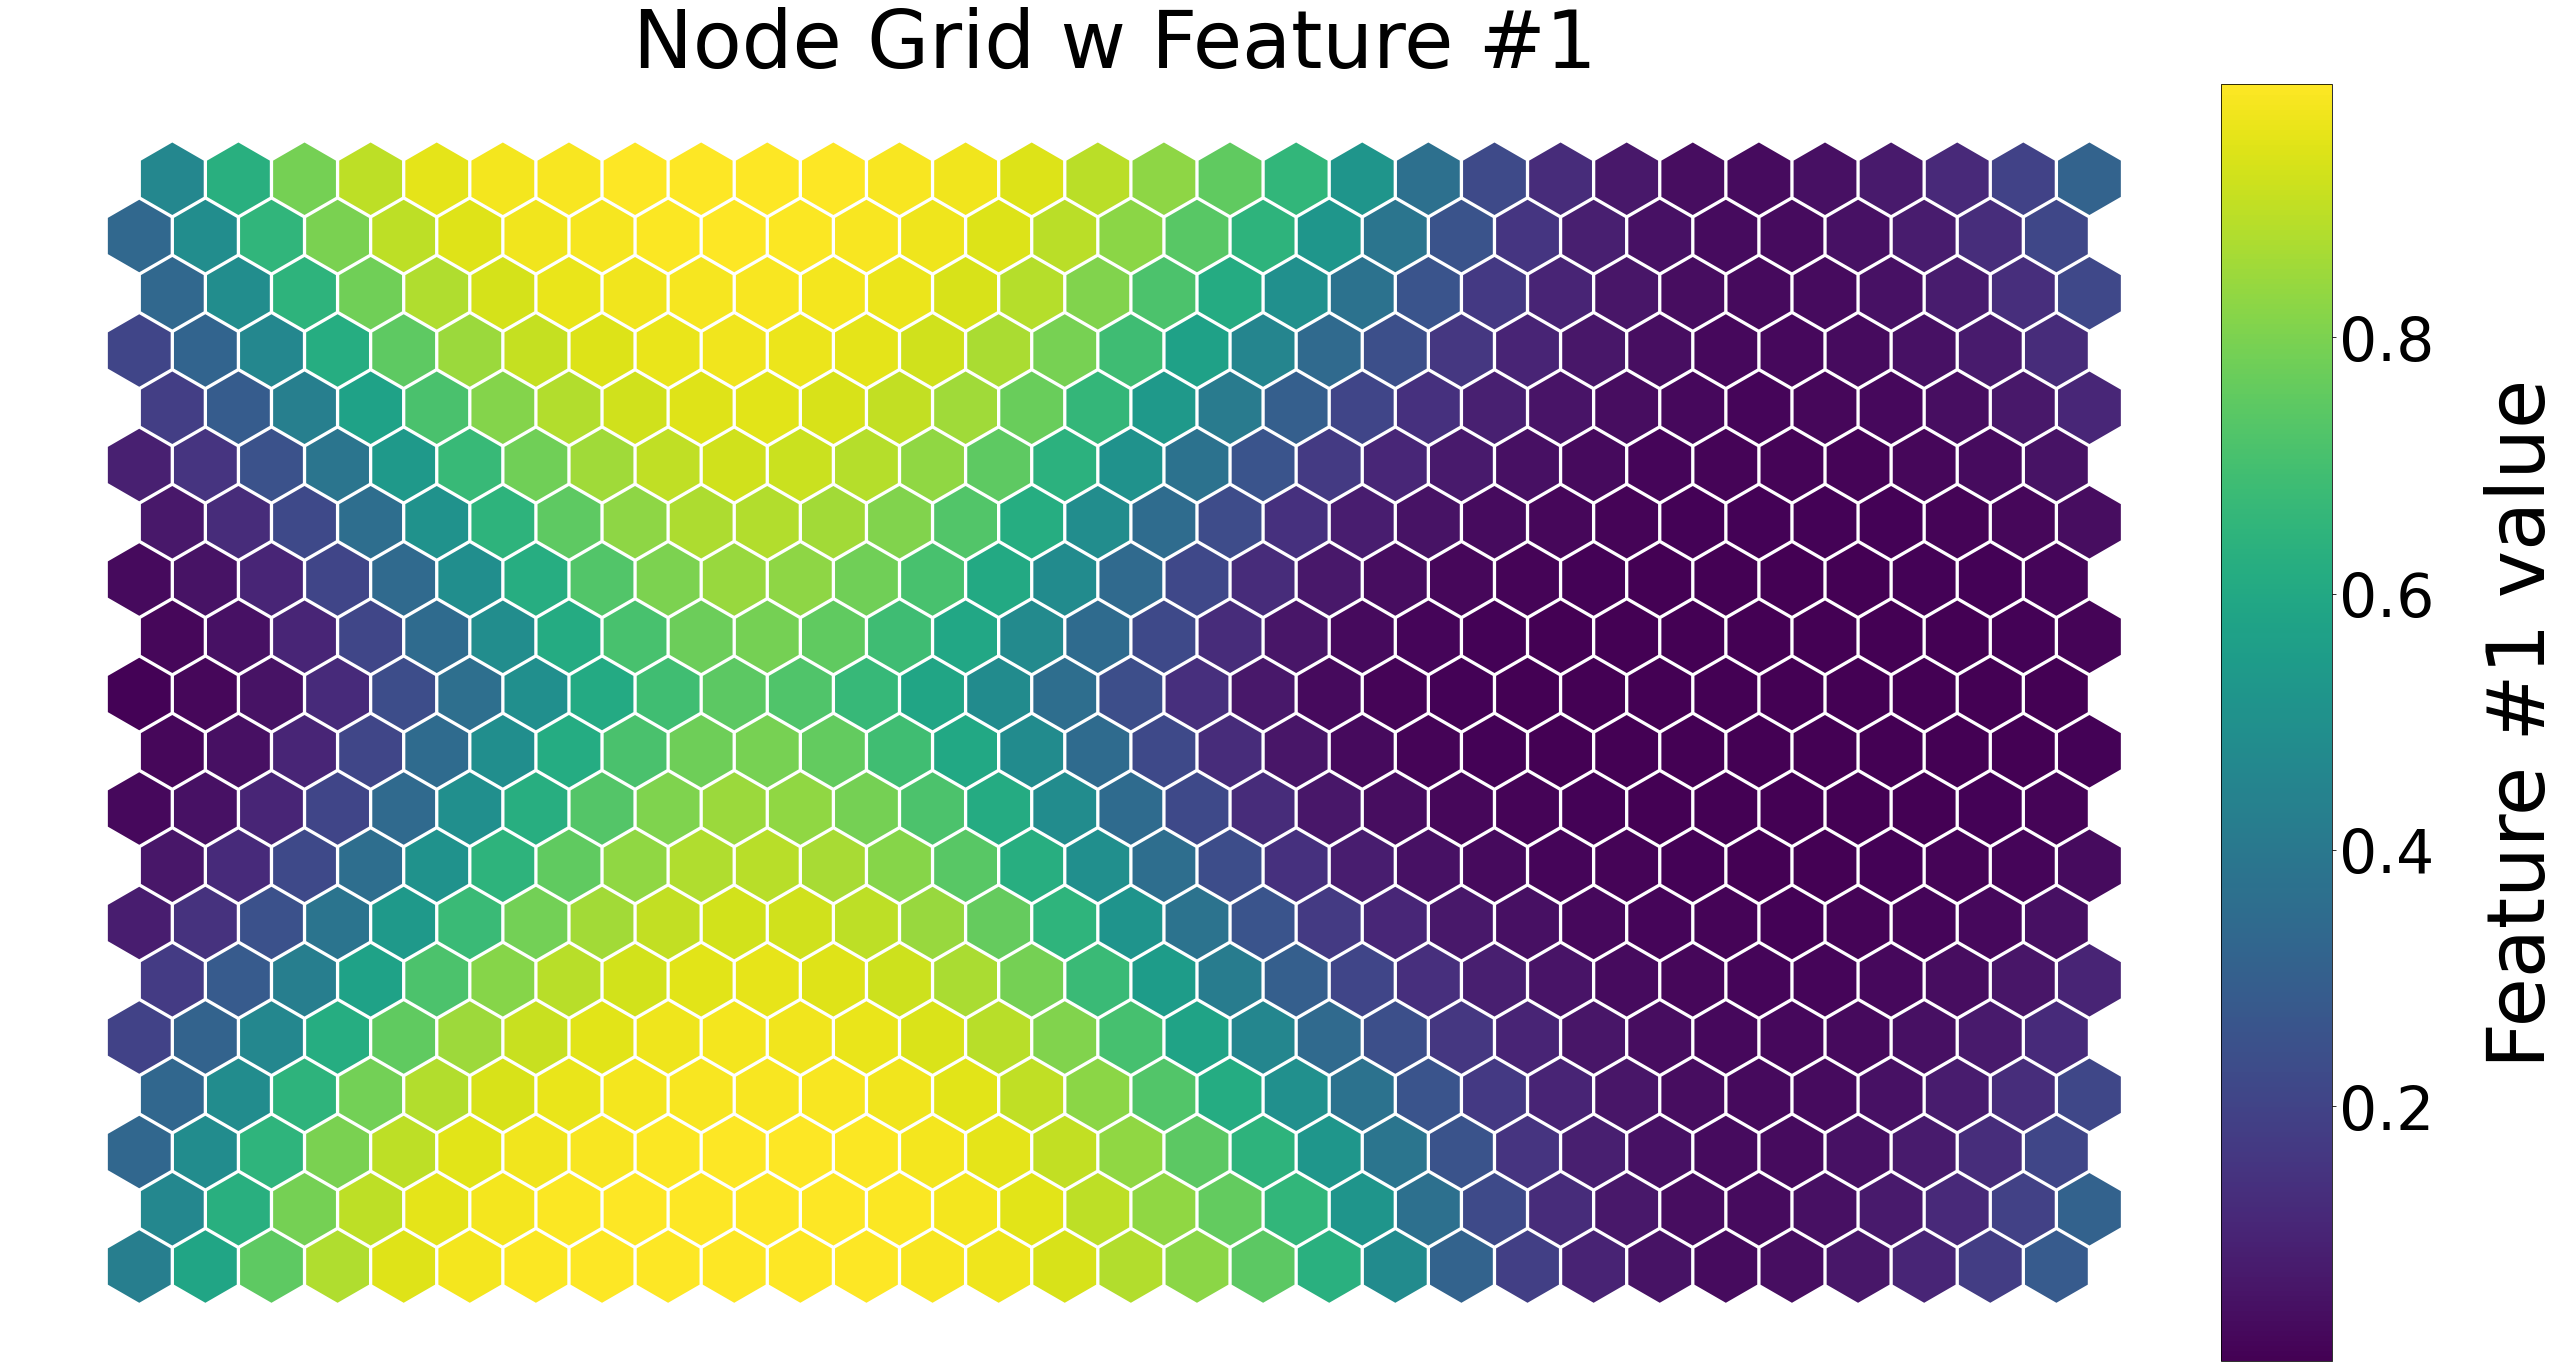

In [216]:
net.nodes_graph(colnum=1)

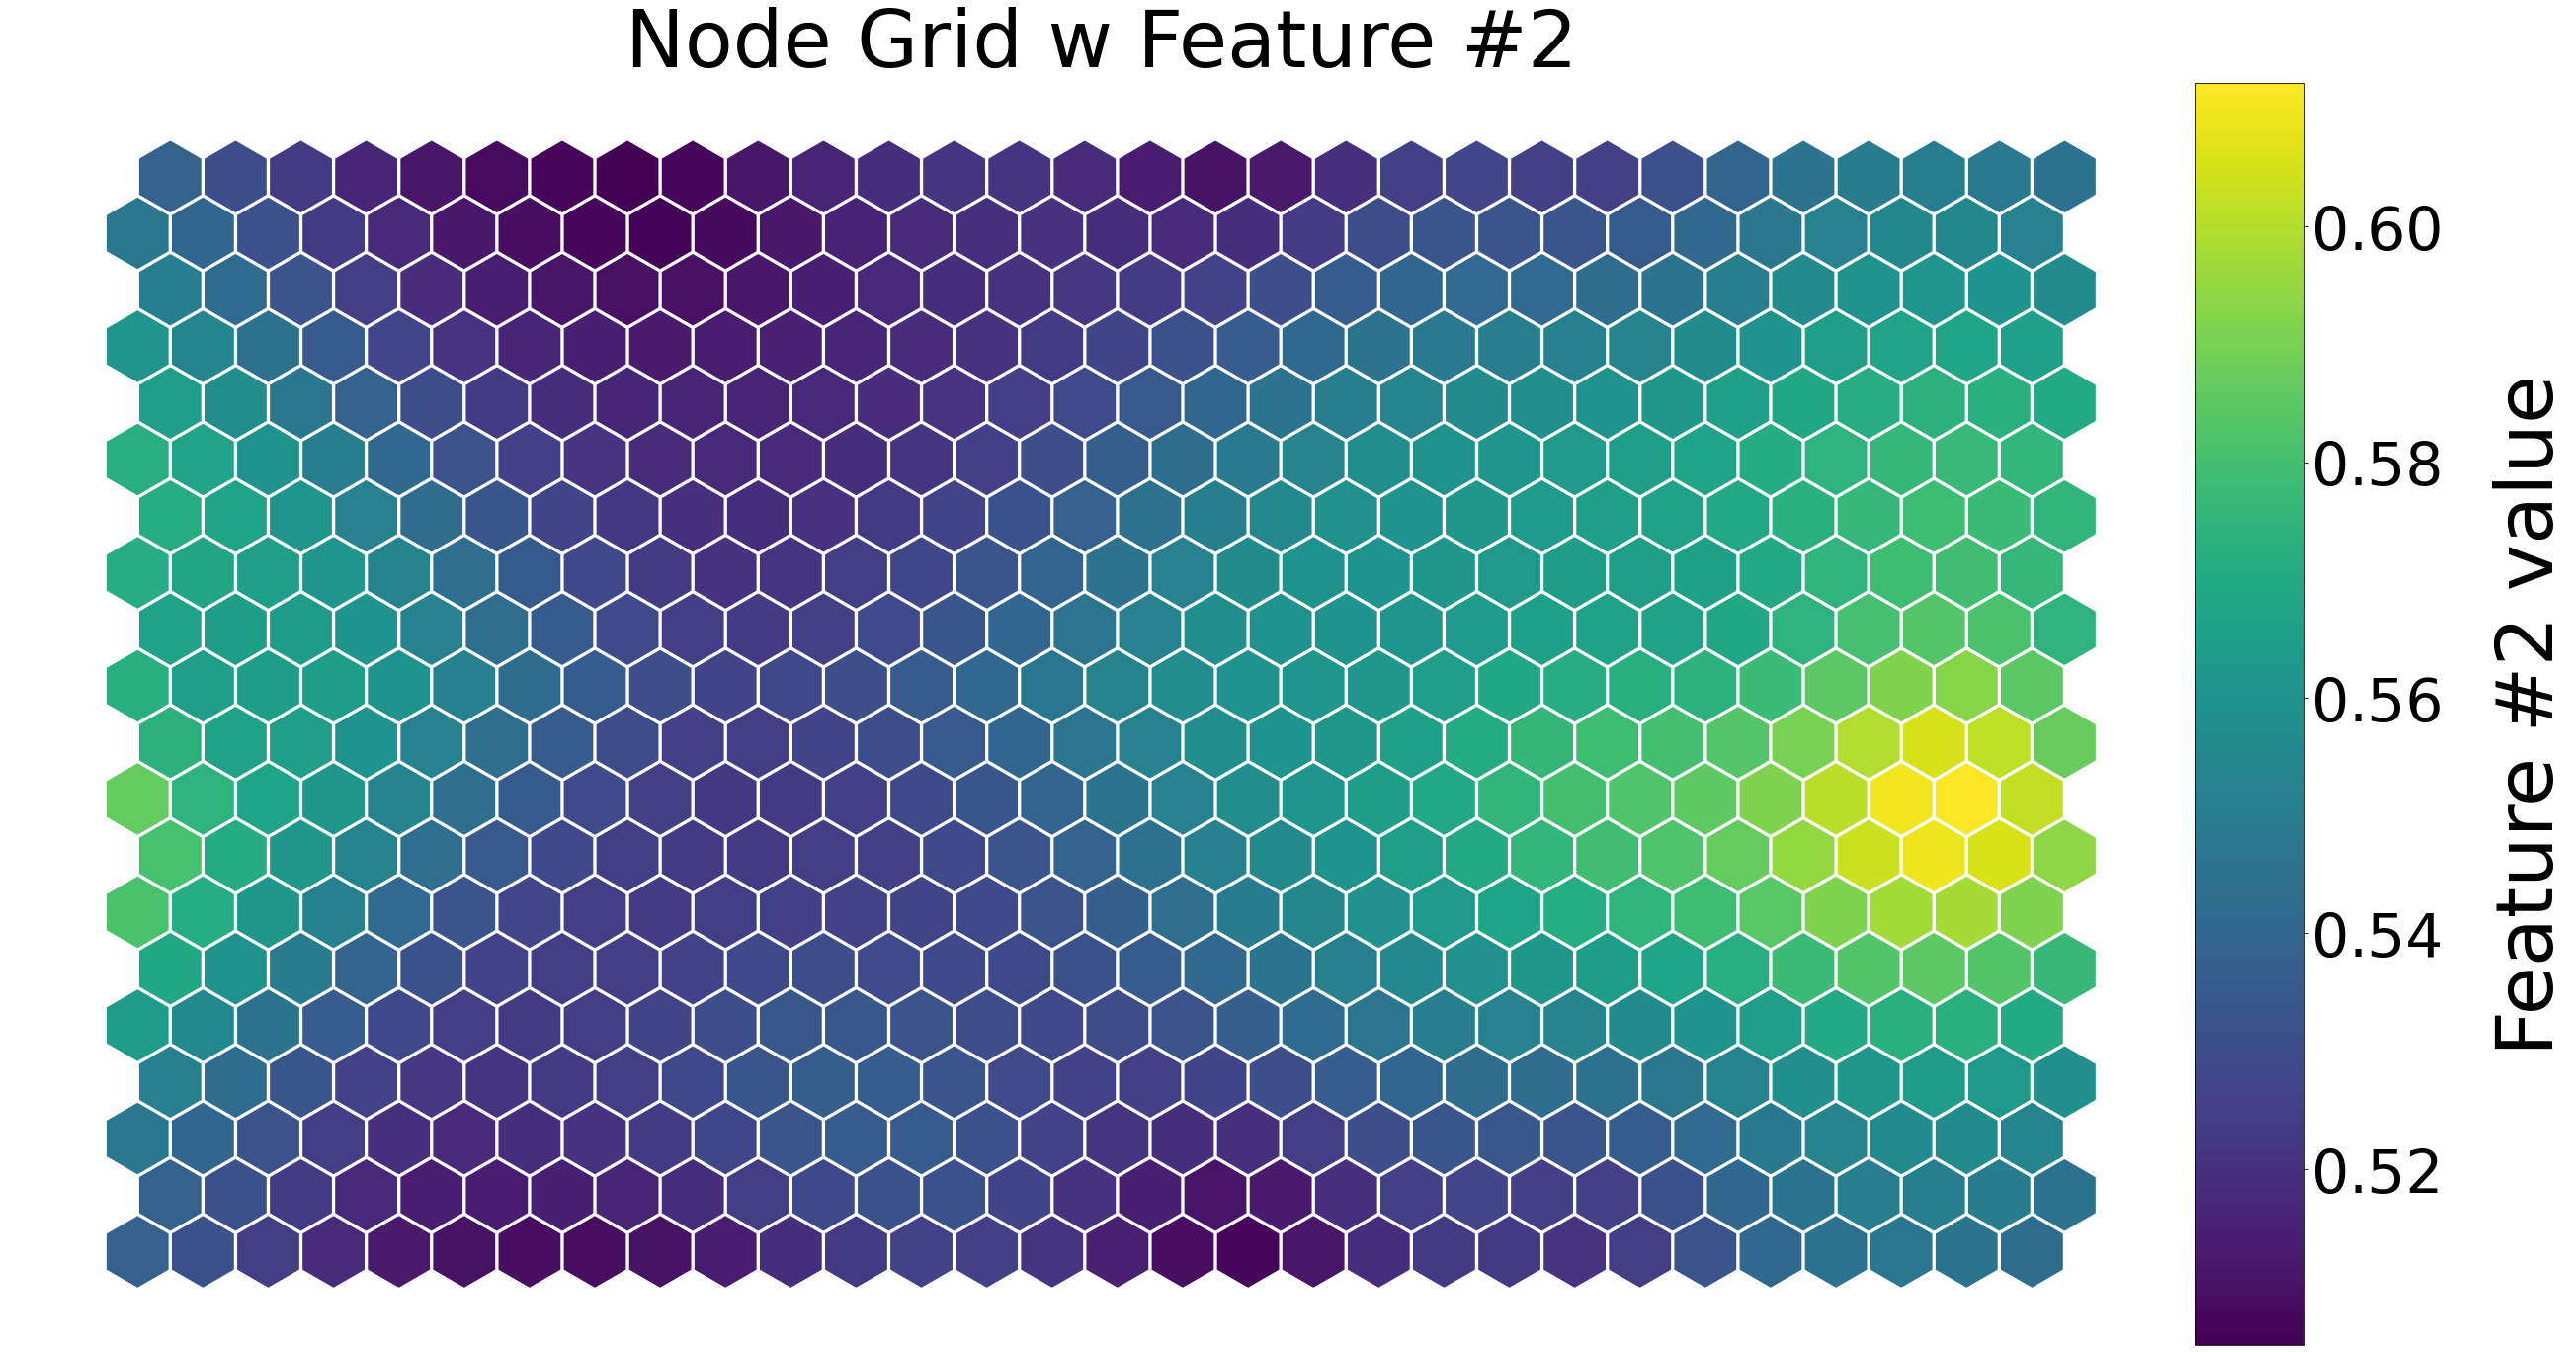

In [217]:
net.nodes_graph(colnum=2)

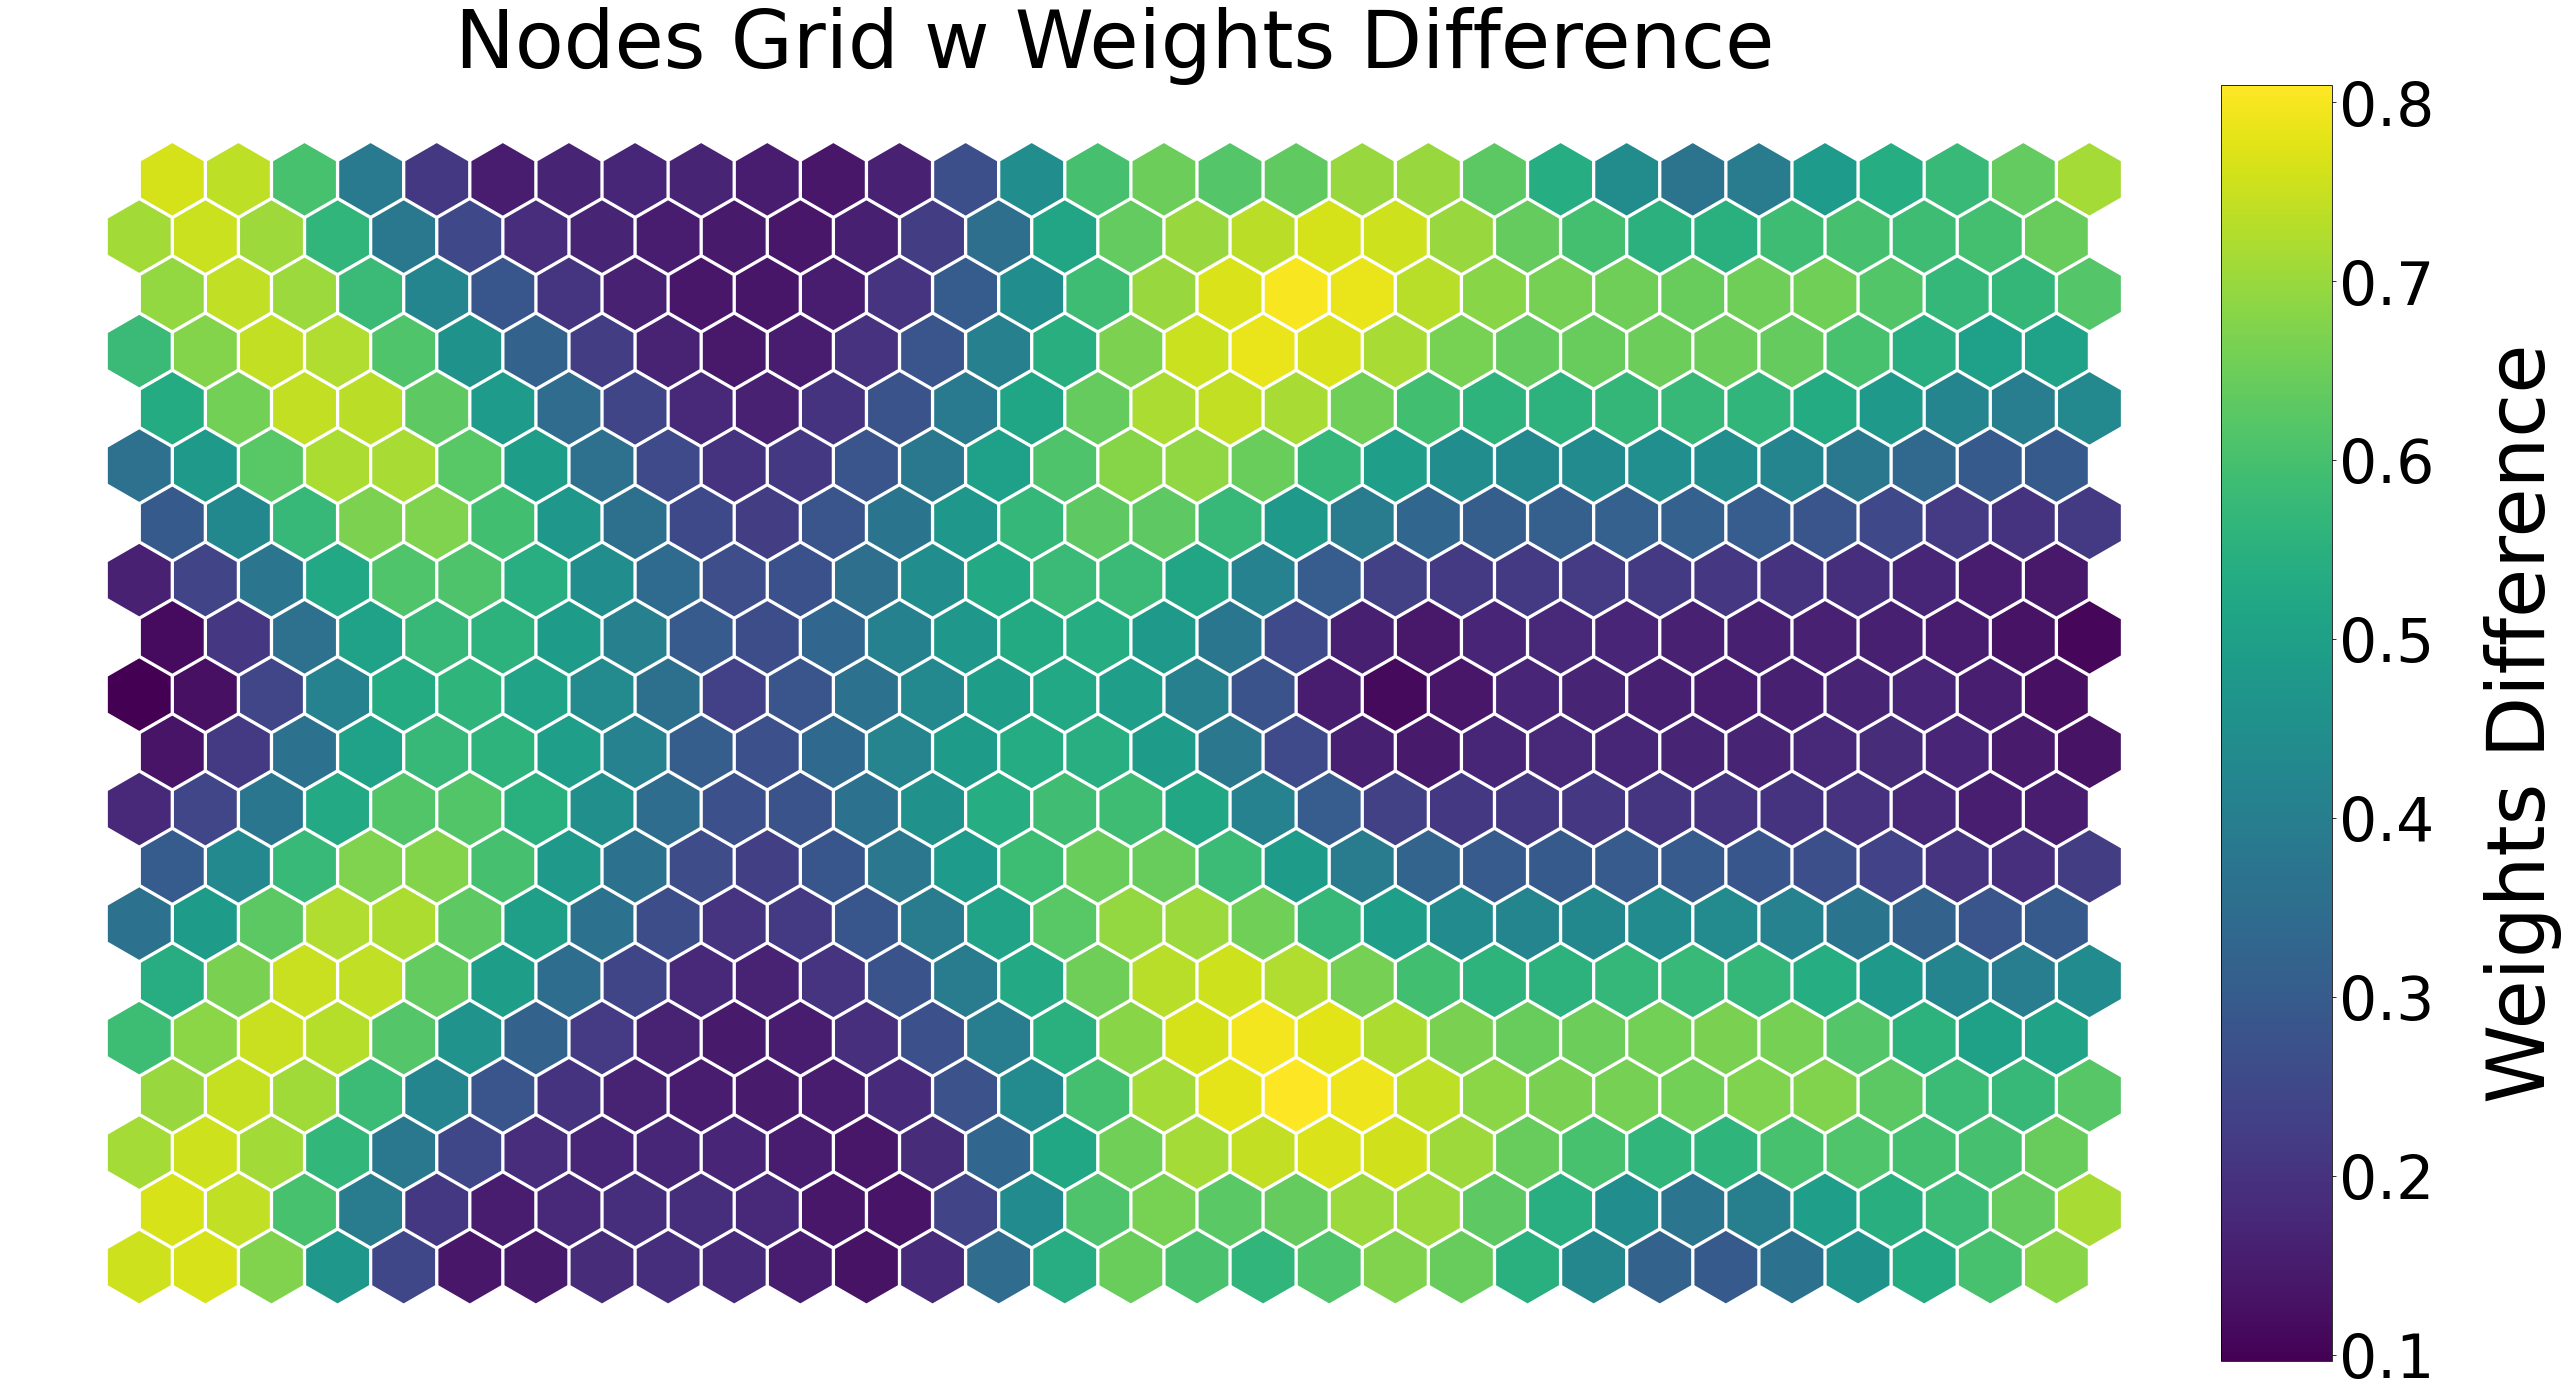

In [218]:
net.diff_graph()

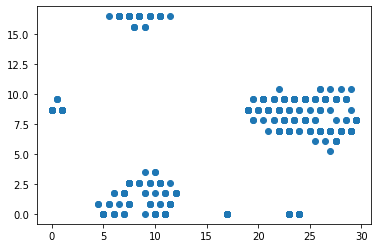

In [211]:
#Получаем 4 кластера которые можно охарактеризовать следующим образом: 1 кластер люди возрастом до 35 лет мужского пола которые имеют болезнь АLT  и нет AST считаются здоровыми. 2 кластер это девушки до 35 лет с такой же болезнью считаются зддоровыми. 3 кластер это мужчины возрастом до 35 лет имеющие ALT + AST считаются больными. 4 кластер это женский пол возрастом от 40+ лет имеющие болезнь AST считаются больными.  
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [212]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [213]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [214]:
# Как видим из резльтатов кластеризации 71% пациентов (людей) были определены верно. 
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7106761319335297

In [ ]:
#Вывод: Была проделана работа по кластеризации с помощью метода К средних. Быд загружен исходный датасет и преобразован для дальнейшей работы (заполнены пропуски, данные были прологарифмированы,избавились от выбросов). Далее было опредеелно с помощью метода локтя и силуэта что лучше всего брать 4 кластера. Из шкалированных данных были выбраны 4 переменные (Возраст пол АЛТ и АСТ Категория).Далее были построены 4 кластера. Для того что бы определить на сколько точна модель мы сравнием ее и иерархческой кластеризаций обучивши модель на 5000. Как видно дальще 71% случаев пересекаются. Точность модели удовлетворительная и ее можно использовать для дальнейшей работы.   